In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 6, 'font.family': "Arial"})

# Single Writer

In [2]:
df_single = pd.read_csv("single_subjectiveScore_final.csv")
df_single.head()

,runId,delayStrategy,revealStrategy,understanding,comfort,ease of use,satisfaction,condition
0,1,real-time,normal,7,5,7,7,real-time_normal
1,1,time,pasting,7,7,5,5,time_pasting
2,1,time,normal,7,4,5,3,time_normal
3,1,time,perfect,7,6,5,6,time_perfect
4,1,character,pasting,6,3,2,2,character_pasting


## Overall

In [10]:
cm = 1/2.54  # centimeters in inches
scale = 0.3
errWidth = 0.5
capsize = 0.2

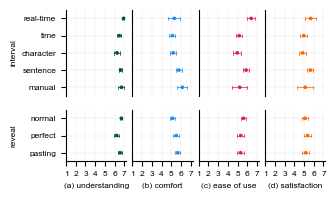

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, gridspec_kw={'height_ratios':[5,3]}, figsize=(8.5*cm, 5*cm))
fig.subplots_adjust(wspace=0.1, hspace=0.2)
nBoot = 10000

# understanding
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["real-time", "time", "character", "sentence", "manual"], data=df_single, x="understanding", y="delayStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[0][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single, x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[1][0])

# comfort
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["real-time", "time", "character", "sentence", "manual"], data=df_single, x="comfort", y="delayStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[0][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single, x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[1][1])

# ease of use
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["real-time", "time", "character", "sentence", "manual"], data=df_single, x="ease of use", y="delayStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[0][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single, x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[1][2])

# satisfaction
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["real-time", "time", "character", "sentence", "manual"], data=df_single, x="satisfaction", y="delayStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[0][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single, x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[1][3])

#  hide labels
for row in range(0, 2):
    for col in range (0, 4):
        ax[row][col].grid(visible=True, linewidth=0.1)
        ax[row][col].set_axisbelow(True)
        ax[row][col].set_xlim([1, 7.2])
#         ax[row][col].axvline(5, color='gray')
        
        if row < 1:
            ax[row][col].xaxis.set_tick_params(labelbottom=False, bottom=False, labelsize=8)
            ax[row][col].set_xlabel('')
            ax[row][col].spines["top"].set_visible(False)
            ax[row][col].spines["right"].set_visible(False)
            ax[row][col].spines["bottom"].set_visible(False)
        else:
            ax[row][col].spines["top"].set_visible(False)
            ax[row][col].spines["right"].set_visible(False)
            ax[row][col].set_xticks([1, 2, 3, 4, 5, 6, 7])
#             ax[row][col].set_facecolor("#f0f0f0")
            ax[row][0].set_xlabel("(a) understanding")
            ax[row][1].set_xlabel("(b) comfort")
            ax[row][2].set_xlabel("(c) ease of use")
            ax[row][3].set_xlabel("(d) satisfaction")
            
        if col > 0:
            ax[row][col].yaxis.set_tick_params(labelleft=False, left=False, labelsize=8)
            ax[row][col].set_ylabel('')
ax[0][0].set_ylabel("interval")
ax[1][0].set_ylabel("reveal")

fig.align_ylabels()
plt.savefig("single_overall.pdf", format="pdf", bbox_inches="tight")


## Grouped

In [13]:
df_single.groupby(["delayStrategy", "revealStrategy"])["understanding"].mean()
df_single.groupby(["delayStrategy", "revealStrategy"])["comfort"].mean()
df_single.groupby(["delayStrategy", "revealStrategy"])["ease of use"].mean()
df_single.groupby(["delayStrategy", "revealStrategy"])["satisfaction"].mean()

delayStrategy  revealStrategy
character      normal            4.695652
               pasting           4.695652
               perfect           5.173913
manual         pasting           5.130435
real-time      normal            5.695652
sentence       normal            5.260870
               pasting           6.043478
               perfect           5.695652
time           normal            4.782609
               pasting           4.869565
               perfect           5.260870
Name: satisfaction, dtype: float64

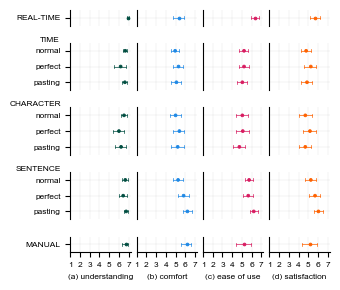

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=4, sharex=True, gridspec_kw={'height_ratios':[1, 3, 3, 3, 1]}, figsize=(8.5*cm, 8*cm))
fig.subplots_adjust(wspace=0.1, hspace=0.5)
nBoot = 10000

# understanding
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_single[df_single.delayStrategy == "real-time"], x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[0][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "time"], x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[1][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "character"], x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[2][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "sentence"], x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[3][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_single[df_single.delayStrategy == "manual"], x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[4][0])

# comfort
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_single[df_single.delayStrategy == "real-time"], x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[0][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "time"], x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[1][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "character"], x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[2][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "sentence"], x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[3][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_single[df_single.delayStrategy == "manual"], x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[4][1])

# ease of use
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_single[df_single.delayStrategy == "real-time"], x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[0][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "time"], x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[1][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "character"], x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[2][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "sentence"], x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[3][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_single[df_single.delayStrategy == "manual"], x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[4][2])

# satisfaction
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_single[df_single.delayStrategy == "real-time"], x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[0][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "time"], x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[1][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "character"], x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[2][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal", "perfect", "pasting"], data=df_single[df_single.delayStrategy == "sentence"], x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[3][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_single[df_single.delayStrategy == "manual"], x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[4][3])

#  hide labels
for row in range(0, 5):
    for col in range (0, 4):
        ax[row][col].grid(visible=True, linewidth=0.1)
        ax[row][col].set_axisbelow(True)
        ax[row][col].set_xlim([1, 7.2])
#         ax[row][col].axvline(5, color='gray')
        
        if row < 4:
            ax[row][col].xaxis.set_tick_params(labelbottom=False, bottom=False, labelsize=8)
            ax[row][col].set_xlabel('')
            ax[row][col].spines["top"].set_visible(False)
            ax[row][col].spines["right"].set_visible(False)
            ax[row][col].spines["bottom"].set_visible(False)
        else:
            ax[row][col].spines["top"].set_visible(False)
            ax[row][col].spines["right"].set_visible(False)
            ax[row][col].set_xticks([1, 2, 3, 4, 5, 6, 7])
            ax[row][0].set_xlabel("(a) understanding")
            ax[row][1].set_xlabel("(b) comfort")
            ax[row][2].set_xlabel("(c) ease of use")
            ax[row][3].set_xlabel("(d) satisfaction")
            
        ax[row][col].set_ylabel('')
        
        if col > 0:
            ax[row][col].yaxis.set_tick_params(labelleft=False, left=False, labelsize=6)
        else:
            if row == 0:              
                ax[row][col].set_yticklabels(["REAL-TIME"])
            elif row == 4:              
                ax[row][col].set_yticklabels(["MANUAL"])
            elif row == 1:
                ax[row][col].set_title("TIME", loc="left", x=-0.5, y=0.85, fontsize=6)
            elif row == 2:
                ax[row][col].set_title("CHARACTER", loc="left", x=-1, y=0.85, fontsize=6)
            elif row == 3:
                ax[row][col].set_title("SENTENCE", loc="left", x=-0.9, y=0.85, fontsize=6)
            
            
# ax[0][0].set_ylabel("interval")
# ax[1][0].set_ylabel("reveal")

fig.align_ylabels()
plt.savefig("single_main.pdf", format="pdf", bbox_inches="tight")


# Pairs

In [17]:
df_pair = pd.read_csv("pair_subjectiveScore_final.csv")
df_pair.head()

,groupId,userId,delayStrategy,revealStrategy,understanding,comfort,ease of use,satisfaction,awareness,naturalness,ability to follow,observerSatisfaction,condition,runId
0,2,2,sentence,perfect,7,5,4,5,2,1,2,1,sentence_perfect,1
1,2,1,sentence,perfect,7,7,7,7,7,6,7,6,sentence_perfect,0
2,2,2,sentence,pasting,7,7,4,6,4,3,3,4,sentence_pasting,1
3,2,1,sentence,pasting,7,7,7,7,7,7,7,7,sentence_pasting,0
4,2,2,real-time,normal,7,7,7,7,7,7,7,7,real-time_normal,1


## Writer

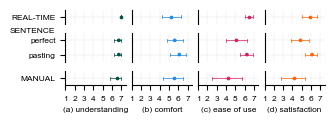

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=4, sharex=True, gridspec_kw={'height_ratios':[1, 2, 1]}, figsize=(8.5*cm, 2.5*cm))
fig.subplots_adjust(wspace=0.1, hspace=0.5)
nBoot = 10000

# understanding
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_pair[df_pair.delayStrategy == "real-time"], x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[0][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["perfect", "pasting"], data=df_pair[df_pair.delayStrategy == "sentence"], x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[1][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_pair[df_pair.delayStrategy == "manual"], x="understanding", y="revealStrategy", join=False, n_boot=nBoot, color='#004D40', ax=ax[2][0])

# comfort
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_pair[df_pair.delayStrategy == "real-time"], x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[0][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["perfect", "pasting"], data=df_pair[df_pair.delayStrategy == "sentence"], x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[1][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_pair[df_pair.delayStrategy == "manual"], x="comfort", y="revealStrategy", join=False, n_boot=nBoot, color='#1E88E5', ax=ax[2][1])

# ease of use
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_pair[df_pair.delayStrategy == "real-time"], x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[0][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["perfect", "pasting"], data=df_pair[df_pair.delayStrategy == "sentence"], x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[1][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_pair[df_pair.delayStrategy == "manual"], x="ease of use", y="revealStrategy", join=False, n_boot=nBoot, color='#D81B60', ax=ax[2][2])

# satisfaction
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_pair[df_pair.delayStrategy == "real-time"], x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[0][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["perfect", "pasting"], data=df_pair[df_pair.delayStrategy == "sentence"], x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[1][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_pair[df_pair.delayStrategy == "manual"], x="satisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[2][3])

#  hide labels
for row in range(0, 3):
    for col in range (0, 4):
        ax[row][col].grid(visible=True, linewidth=0.1)
        ax[row][col].set_axisbelow(True)
        ax[row][col].set_xlim([1, 7.5])
#         ax[row][col].axvline(5, color='gray')
        
        if row < 2:
            ax[row][col].xaxis.set_tick_params(labelbottom=False, bottom=False, labelsize=8)
            ax[row][col].set_xlabel('')
            ax[row][col].spines["top"].set_visible(False)
            ax[row][col].spines["right"].set_visible(False)
            ax[row][col].spines["bottom"].set_visible(False)
        else:
            ax[row][col].spines["top"].set_visible(False)
            ax[row][col].spines["right"].set_visible(False)
            ax[row][col].set_xticks([1, 2, 3, 4, 5, 6, 7])
            ax[row][0].set_xlabel("(a) understanding")
            ax[row][1].set_xlabel("(b) comfort")
            ax[row][2].set_xlabel("(c) ease of use")
            ax[row][3].set_xlabel("(d) satisfaction")
            
        ax[row][col].set_ylabel('')
        
        if col > 0:
            ax[row][col].yaxis.set_tick_params(labelleft=False, left=False, labelsize=6)
        else:
            if row == 0:              
                ax[row][col].set_yticklabels(["REAL-TIME"])
            elif row == 2:              
                ax[row][col].set_yticklabels(["MANUAL"])
            elif row == 1:
                ax[row][col].set_title("SENTENCE", loc="left", x=-0.92, y=0.73, fontsize=6)

fig.align_ylabels()
plt.savefig("pair_writer.pdf", format="pdf", bbox_inches="tight")


## Observer

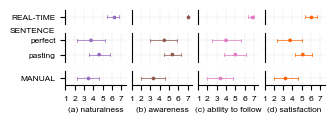

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=4, sharex=True, gridspec_kw={'height_ratios':[1, 2, 1]}, figsize=(8.5*cm, 2.5*cm))
fig.subplots_adjust(wspace=0.1, hspace=0.5)
nBoot = 10000

# naturalness
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_pair[df_pair.delayStrategy == "real-time"], x="naturalness", y="revealStrategy", join=False, n_boot=nBoot, color='#9467bd', ax=ax[0][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["perfect", "pasting"], data=df_pair[df_pair.delayStrategy == "sentence"], x="naturalness", y="revealStrategy", join=False, n_boot=nBoot, color='#9467bd', ax=ax[1][0])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_pair[df_pair.delayStrategy == "manual"], x="naturalness", y="revealStrategy", join=False, n_boot=nBoot, color='#9467bd', ax=ax[2][0])

# awareness
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_pair[df_pair.delayStrategy == "real-time"], x="awareness", y="revealStrategy", join=False, n_boot=nBoot, color='#8c564b', ax=ax[0][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["perfect", "pasting"], data=df_pair[df_pair.delayStrategy == "sentence"], x="awareness", y="revealStrategy", join=False, n_boot=nBoot, color='#8c564b', ax=ax[1][1])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_pair[df_pair.delayStrategy == "manual"], x="awareness", y="revealStrategy", join=False, n_boot=nBoot, color='#8c564b', ax=ax[2][1])

# ability to follow
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_pair[df_pair.delayStrategy == "real-time"], x="ability to follow", y="revealStrategy", join=False, n_boot=nBoot, color='#e377c2', ax=ax[0][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["perfect", "pasting"], data=df_pair[df_pair.delayStrategy == "sentence"], x="ability to follow", y="revealStrategy", join=False, n_boot=nBoot, color='#e377c2', ax=ax[1][2])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_pair[df_pair.delayStrategy == "manual"], x="ability to follow", y="revealStrategy", join=False, n_boot=nBoot, color='#e377c2', ax=ax[2][2])

# satisfaction
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["normal"], data=df_pair[df_pair.delayStrategy == "real-time"], x="observerSatisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[0][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["perfect", "pasting"], data=df_pair[df_pair.delayStrategy == "sentence"], x="observerSatisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[1][3])
sns.pointplot(capsize=capsize, errwidth=errWidth, scale=scale, errorbar=("ci", 95), order=["pasting"], data=df_pair[df_pair.delayStrategy == "manual"], x="observerSatisfaction", y="revealStrategy", join=False, n_boot=nBoot, color='#FE6100', ax=ax[2][3])

#  hide labels
for row in range(0, 3):
    for col in range (0, 4):
        ax[row][col].grid(visible=True, linewidth=0.1)
        ax[row][col].set_axisbelow(True)
        ax[row][col].set_xlim([1, 7.5])
#         ax[row][col].axvline(5, color='gray')
        
        if row < 2:
            ax[row][col].xaxis.set_tick_params(labelbottom=False, bottom=False, labelsize=8)
            ax[row][col].set_xlabel('')
            ax[row][col].spines["top"].set_visible(False)
            ax[row][col].spines["right"].set_visible(False)
            ax[row][col].spines["bottom"].set_visible(False)
        else:
            ax[row][col].spines["top"].set_visible(False)
            ax[row][col].spines["right"].set_visible(False)
            ax[row][col].set_xticks([1, 2, 3, 4, 5, 6, 7])
            ax[row][0].set_xlabel("(a) naturalness")
            ax[row][1].set_xlabel("(b) awareness")
            ax[row][2].set_xlabel("(c) ability to follow")
            ax[row][3].set_xlabel("(d) satisfaction")
            
        ax[row][col].set_ylabel('')
        
        if col > 0:
            ax[row][col].yaxis.set_tick_params(labelleft=False, left=False, labelsize=6)
        else:
            if row == 0:              
                ax[row][col].set_yticklabels(["REAL-TIME"])
            elif row == 2:              
                ax[row][col].set_yticklabels(["MANUAL"])
            elif row == 1:
                ax[row][col].set_title("SENTENCE", loc="left", x=-0.92, y=0.73, fontsize=6)

fig.align_ylabels()
plt.savefig("pair_observer.pdf", format="pdf", bbox_inches="tight")


In [21]:
df_pair.groupby(['delayStrategy', 'revealStrategy'])['awareness'].mean()

delayStrategy  revealStrategy
manual         pasting           3.250
real-time      normal            7.000
sentence       pasting           5.375
               perfect           4.500
Name: awareness, dtype: float64